# Ch6. Beyond Born-Oppenheimer

## Install

In [17]:
#Installment
!pip install numpy
!pip install scipy



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.special import hermite
from math import factorial

## 6.1. Non-Born-Oppenheimer molecular Hamiltonian

### Internal Hamiltonian operator

#### Explicitly correlated all-particle Gaussian functions

### Energy minimization

## 6.2. Vibrational frequency analysis calculations

BO 근사를 사용하지 않는다면 분자의 에너지는 전자기적인 에너지와 핵의 운동도 포함하여야 하므로, 진동, 회전에 의한 에너지도 포함하게 된다. 
$$E_{total}=E_{rotational}+E_{vibrational}+E_{elec}$$
분자의 진동은, 원자와 원자사이에 전자기력에 의한 Bonding에 의한 진동으로, 입자와 스프링의 역학인 조화진동자로 모델링할 수 있다. 만약 진동에너지가 너무 커진다면 조화진동자를 사용할 수 없다. 또한 조화진동자에서 사용한는 Normal mode 또한 사용할 수 없다는것은 알아두어야한다. 즉 진동이 커질수록 이러한 계산방법은 오차가 커질것이다.
 
이러한 점을 염두해 두고 간단한 케이스의 이원자분자를 고려해보자.  

### Modeling the vibrational-rotational levels of a diatomic molecule

#### 1. Rotational E 
이원자분자의 Rotatinal 에너지는 아래와같이 이산적인 값들의 조합으로 표현된다. 
$$E_{rotatinal} = \frac{J(J+1)\hbar^2}{2MR^2_e}$$
여기서 각 notation 은 아래와 같다. 
- J : 각운동량 양자수
- $R_e$ : 평형거리
- M : Reduced mass : M =: $\frac{M_A M_B}{M_A + M_B}$
회전하지 않는 분자에 대해서는 J 가 0이다 (따라서 BO근사를 하게되면 , rotation에 의한 에너지 항이 0이 된다.)

#### 2.Vibration 에 의한 potential 에너지 
앞서 정의한대로 Vibraion 은 조화진동자로 모델링 하기로 하였다. 따라서 potential 에너지는 아래와같이 근사할 수 있다. 
$$E_{pot}(x) = \frac{1}{2}kx^2$$
- x : 평형점으로부터의 변위

에너지를 이렇게 정의하게되면 마찬가지로 양자조화진동자 모델도 그대로 적용하여 에너지를 아래와같이 간단하게 표현 할 수 있다.
$$E_\nu = h\omega(\nu + \frac{1}{2})$$
- $\nu$ : Vibrational 양자수 
- $ \omega = \sqrt{\frac{k}{M}}$

그리고 이에 대응되는 양자조화진동자의 양자상태는 아래와 같다.
$$\psi_\nu(x) = \frac{1}{\sqrt{2^{\nu}\nu!}} \cdot (\frac{M\omega}{\pi \hbar})^{1/4} \cdot H_{\nu}(\sqrt{\frac{M\omega}{\hbar}}x) \cdot e^{-M\omega x^2 /2\hbar}$$
- $H_{\nu}(z) = (-1)^\nu (e^{z^2}) \frac{d^\nu}{dz^\nu} (e^{-z^2}) \quad [\nu 차의 \, Hermite \, polynomial]$

이 Hermite polynomial 은 아래와같은 Reculsion Relation을 만족한다. 
$$zH_\nu (z) = zH_{\nu-1} (z) + \frac{1}{2}H_{\nu+1} (z) $$

이 관계를 이용해 첫 3개의 Polynomial을 구해보면 아래와 같다. 
- $H_0(z) = 1$
- $H_1(z) = 2z$
- $H_2(z) = 4z^2-2$

이 솔루션을 이제 파이썬을 이용해 그려볼것이다. 

우선 정규화 상수를 하나로 묶고, 사용자지정함수를 통해 정의한다. 
$$N(\nu) = (\sqrt{\pi} 2^\nu \nu!)^{-1/2}$$

In [19]:
def N(v):
    return 1./np.sqrt(np.sqrt(np.pi)*(2**v)*factorial(v))

그리고 함수부분도 마찬가지로 정의한다.

In [20]:
def Psi(v, x):
  return N(v)*hermite(v)(x)*np.exp(-0.5*x**2)

그리고 앞서 정의한 포텐셜 과 각 주양자수별 상태를 그리는 함수를 정의해주고 그림을 그려본다. 위는 확률진폭을 나타내고, 아래는 확률진폭의 제곱인 확률밀도함수를 그려주게된다. 

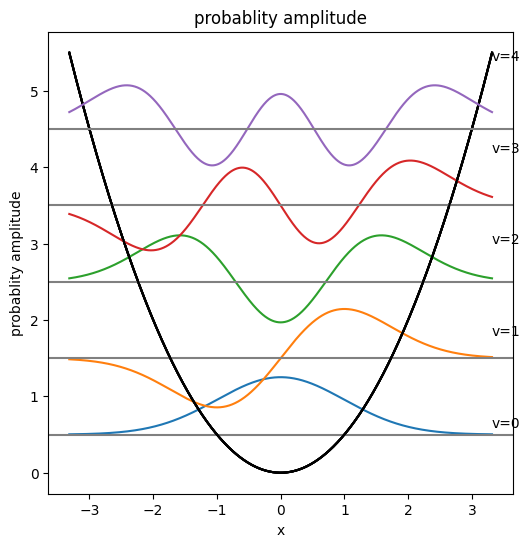

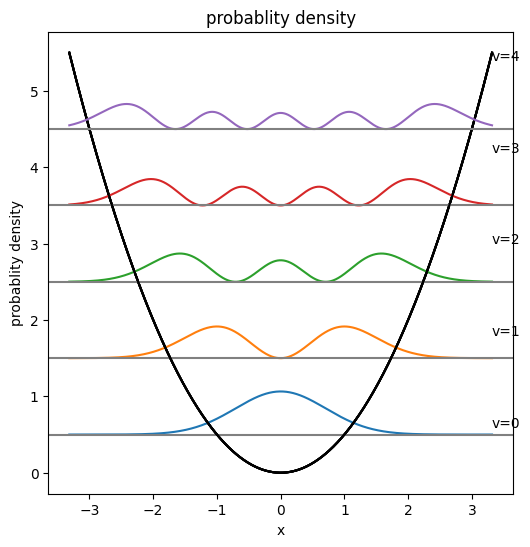

In [21]:
def plot(n):
  fig, ax = plt.subplots(figsize=(n+1,n+1))

  # Range of x
  xmax = np.sqrt(2*n+1)
  x = np.linspace(-xmax, xmax, 1000)

  for v in range(n):
    # plot potential energy function 0.5*x**2
    ax.plot(x,0.5*x**2,color='black')
    
    # plot spatial probabilities psi squared for each energy level
    ax.plot(x,Psi(v,x) + v + 0.5)
    
    # add lines and labels
    ax.axhline(v + 0.5, color='gray', linestyle='-') 
    ax.text(xmax, 1.2*(v+0.5), f"v={v}")

  ax.set_xlabel('x')
  ax.set_ylabel('probablity amplitude')
  plt.title("probablity amplitude")

def plot_p(n):
  fig, ax = plt.subplots(figsize=(n+1,n+1))

  # Range of x
  xmax = np.sqrt(2*n+1)
  x = np.linspace(-xmax, xmax, 1000)

  for v in range(n):
    # plot potential energy function 0.5*x**2
    ax.plot(x,0.5*x**2,color='black')
    
    # plot spatial probabilities psi squared for each energy level
    ax.plot(x,Psi(v,x)**2 + v + 0.5)
    
    # add lines and labels
    ax.axhline(v + 0.5, color='gray', linestyle='-') 
    ax.text(xmax, 1.2*(v+0.5), f"v={v}")

  ax.set_xlabel('x')
  ax.set_ylabel('probablity density')
  plt.title("probablity density")  

plot(5)
plot_p(5)

여기서 진동에너지가 더 커지면, 즉 평형점부터의 변위가 점점 커지면 포텐셜은 비조화 진동자로 근사를 하여야한다. 

이경우는 아래와같이 2차term 까지만 사용한다. 
$$E_{vib}(v)=h\omega(v+\frac{1}{2}) - \chi h \omega (v+\frac{1}{2})^2$$
- $\chi$ : 비조화성 상수 (얼마난 비조화이지를 나타내는 상수)

여기서 양자수(v)가 증가할수록 에너지 간격은 좁아진다

핵간거리 $R$ 로 표현되는 회전에너지는 마찬가지로 평형점 $R_e$ 에 대해서 테일러전개 할 수 있다. 
$$E_{rot} =\frac{J(J+1)\hbar^2}{2MR^2} \simeq \frac{J(J+1)\hbar^2}{2MR^2_e} + \frac{J^2(J+1)^2\hbar^4}{2M^2kR^6_e} + \frac{J^3(J+1)^3\hbar^6}{2M^3k^2R^10_e} + \cdots$$ 
- k : 두 원자를 묶어두는 힘에 대응되는 상수

그리고 아래와같이 힘을 표현한다고 한다. 

$$F_rotational(J) = B_e J(J+1) + D_e J^2(J+1)^2 + H_e J^3(J+1)^3 + \cdots $$
여기서$ B_e$ 는 Rotational Constant 이고, $D_e$, $H_e$ 는 Centrifugal(구심력) constants 이다. 
- $$B_e = \frac{\hbar}{4 \pi cMR^2_e}$$
- $$D_e = \frac{\hbar^3}{4 \pi ckM^2R^6_e}$$
- $$H_e = \frac{3\hbar^5}{4 \pi ck^2M^3R^{10}_e}$$

이제 마차가지로 이러한 표현을 코드로써 표현해보자. 

In [22]:
# F_rot 를 정의한 함수
def F_rot(J, Be, De, He, show=False):
  F = Be*J*(J+1) + De*J**2*(J+1)**2 - He*J*3*(J+1)**3*10e-5
  if show:
    print("{} {:.2f}".format(J, F))
  return F

여기서 각 값들은 미리 계산된 레퍼런스를 활용한다. 
- Ground state $E(v,J=0)$ energy computed by Komasa et al. in 2011 [Komasa]
- Rovibrational parameters of the vibrational levels v = 0 to v = 13 computed by Campargue in 2011 [Campargue]

In [23]:
# Source of the ground rotational state E(v,J=0) energy: [Komasa]
# Source of the constants data Ee, Be, De, He, and rms: [Campargue]

#      v   E(v,J=0)    Ee          Be         De        He     rms
rov = {0: (36118.0696, 0.0,        59.33289, -0.045498, 4.277, 3.4), 
       1: (31956.9034, 4161.1693,  56.37318, -0.043961, 4.168, 3.2),
       2: (28031.0670, 8087.0058,  53.47892, -0.042523, 4.070, 3.2),
       3: (24335.6787, 11782.3940, 50.62885, -0.041175, 3.963, 3.2),
       4: (20867.7039, 15250.3688, 47.79997, -0.039927, 3.846, 3.2),
       5: (17626.1400, 18491.9328, 44.96596, -0.038795, 3.717, 3.2),
       6: (14612.2901, 21505.7826, 42.09566, -0.037808, 3.571, 3.1),
       7: (11830.1543, 24287.9184, 39.15105, -0.037004, 3.399, 3.1),
       8: (9286.9790,  26831.0937, 36.08416, -0.036451, 3.187, 3.1),
       9: (6994.0292,  29124.0436, 32.83233, -0.036251, 2.902, 3.2)}

이 레퍼런스 자료를 이용하여, 바닥상태에있는 수소분자와 첫번째 여기있는 수소분자의 Vibrational 양자수에 따른 에너지 차이를 계산해 볼 수 있다. 

In [25]:
print("v  E(v,J=0)    E(v,J=1)    BO Diff.")
for v in range(10):
    E0 = rov[v][0] - F_rot(0, rov[v][2], rov[v][3], rov[v][4])
    E1 = rov[v][0] - F_rot(1, rov[v][2], rov[v][3], rov[v][4])
    print("{}  {:.4f}  {:.4f}  {:.4f}".format(v, E0, E1, E0 - E1))

v  E(v,J=0)    E(v,J=1)    BO Diff.
0  36118.0696  35999.5961  118.4735
1  31956.9034  31844.3429  112.5605
2  28031.0670  27924.2890  106.7780
3  24335.6787  24234.5952  101.0835
4  20867.7039  20772.2729  95.4310
5  17626.1400  17536.3722  89.7678
6  14612.2901  14528.2586  84.0315
7  11830.1543  11752.0084  78.1459
8  9286.9790  9214.9641  72.0149
9  6994.0292  6928.5165  65.5127


In [ ]:
# Modeling a diatomic molecule

##### Figure 6.5 - Potential energy(black parabola) and spatial probabilites (color) of the normalized quantum harmonic oscillator wavefunctions for $ v = 0 $ to $ v = 4 $

In [ ]:
# Modeling a diatomic molecule

##### Figure 6.6 - Vibrational energy levels of the hydrogen molecule for $v = 0, \ldots, 0, J = 0$ and $J = 1$

### Computing all vibrational-rotational levels of a molecule

간단한 예시를 앞서 보였고, 이제 분자의 모든 Vibrational level을 구하는 방법의 개요를 설명하겠다. 

#### Optimizing the geometry of the molecule

Vibratornal 분석을 위해 Geometry를 구성하기 위해 원자의 position이 평형점에 있도록 위치를 최적화 해야한다. 

이는 수학적으로는 에너지의 모든 공간축에대한 1차미분이 0이되며 된다. 좌표는 Catesian 좌표를 사용한다. 그럼 아래와같이 정의할 수 있다. 
$$\frac{\partial E}{\partial x_i}=\frac{\partial E}{\partial y_i}=\frac{\partial E}{\partial z_i}=0$$

#### Calculating a force constant Hessian matrix

Force constant 도 마찬가지로 계산한다. 

이는 회전과 진동에너지를 각각의 입자, 그리고 각 좌표에 대해 2차미분 한 Hessian으로 정의할 수 있다. 

$$ F_{x_i,x_j} = \frac{\partial^2 E}{\partial x_i \partial x_j}, F_{x_i,y_j} = \frac{\partial^2 E}{\partial x_i \partial y_j} , F_{x_i,z_j} = \frac{\partial^2 E}{\partial x_i \partial z_j}, \cdots  $$
- i,j : 원자에 대응되는 index i,j = 0, 1, ... , n

이 Hessian 행렬은 $3n \times 3n$ 행렬이 된다. 이 2차 미분들은 수치적으로 이러한 값들을 표현할 수 없더라도 Gradient의 미소변위를 통해 계산될 수 있다. 

#### Converting to mass weighted Cartesian coordinates

여기서는 각 입자의 좌표계를 조절하는 상수를 곱해 Scaling 해주게 된다. 그렇게 하면, 나중에 그 상수를 나눠 Hessian 행렬의 i,j 를 얻을 수 있다. 
- $$x_i \to \sqrt{m_i} x_i$$
- $$y_i \to \sqrt{m_i} y_i$$
- $$z_i \to \sqrt{m_i} z_i$$

#### Diagnalizing the mass weightened Hesssian matrix

그렇게 하면, mass weighted Hesssian 행렬은 $3n$개의 고유벡터 set 와 $3n$개의 고유치로 대각화 될 수 있다. 
그리고 아래와같은 식을 이용해, 각 조화진동자의 진동수를 얻을 수 있다. 
$$\nu = \frac{1}{2\pi} \sqrt{\frac{k}{\mu}}$$

- $\mu$ : Reduced Mass
- k : force constant

근데 여기서 계산한 $\nu$ 는 $s^{-1}$ 차원을 가지는 물리량이다. 
이를 $cm^{-1}$의 거리단위로 바꿔주게 되면 그 양은 아래와같다. 
$$f = \frac{1}{2\pi c} \sqrt{\frac{k}{\mu}} $$

이제부터는 open source 양자화학 패키지 Pi4 와 이 방식을 이용해서 CO2 분자를 모델링해볼것이다.
“Get Started with Psi4” 이 document를 읽어보는것을 추천한다.


## 6.3. Vibrational spectra for ortho-para isomerization of hydrogen molecules

In [ ]:
# Code here?

## Summary